In [1]:
import urllib3
import pandas as pd
from io import StringIO
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load the data
http = urllib3.PoolManager()
urls = ['https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/seattle_incidents_summer_2014.csv',
        'https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv',
        ]
cities = ['seattle', 'san_francisco']
data = {}
for city, url  in zip(cities,urls):
    r = http.request('GET', url)
    data[city] = r.data.decode('utf-8')
print(type(data['seattle']))
df_seattle      = pd.read_csv(StringIO(data['seattle']), sep=',', parse_dates=['Date Reported', 'Occurred Date or Date Range Start', 'Occurred Date Range End'])
df_san_franciso = pd.read_csv(StringIO(data['san_francisco']), sep=',')

<class 'str'>


,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,date range,counter
Occurred Date or Date Range Start,,,,,,,,,,,,,,,,,,,,,
152,397,397,397,397,397,397,397,397,397,221,...,397,397,395,397,397,397,397,397,221,397
153,419,419,419,419,419,419,419,419,419,215,...,419,419,418,419,419,419,419,419,215,419
154,357,357,357,357,357,357,357,357,357,179,...,356,356,356,357,357,357,357,357,179,357
155,392,392,392,392,392,392,392,392,392,188,...,392,392,392,392,392,392,392,392,188,392
156,386,386,386,386,386,386,386,386,386,211,...,386,386,386,386,386,386,386,386,211,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,361,361,361,361,361,361,361,361,361,163,...,361,361,361,361,361,361,361,361,163,361
240,348,348,348,348,348,348,348,348,348,170,...,346,346,346,348,348,348,348,348,170,348
241,398,398,398,398,398,398,398,398,398,226,...,396,396,395,398,398,398,398,398,226,398


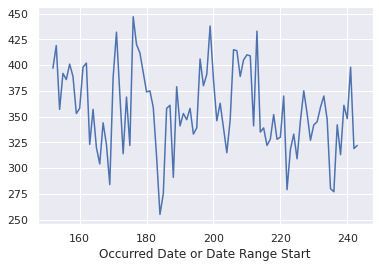

In [105]:
#df_seattle.head()
grp = df_seattle.groupby(df_seattle['Occurred Date or Date Range Start'].dt.dayofyear).count()
grp['RMS CDW ID'].plot()
grp

In [106]:
%matplotlib inline

0.0      13613
1.0        889
2.0        519
3.0        297
4.0        163
         ...  
115.0        1
152.0        1
190.0        1
89.0         1
260.0        1
Name: date range, Length: 125, dtype: int64

['PROSTITUTION PATRONIZING', 'PROSTITUTION', 'PROSTITUTION LOITERING', 'PROSTITUTION-ASSIST-PROMOTE']


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

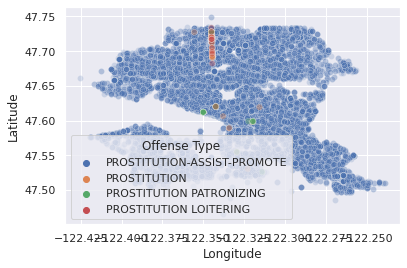

In [113]:
# filter records that have strange longitude
df_seattle = df_seattle[df_seattle['Longitude']<0]
df_seattle['counter'] = 1
df_seattle['hour'] = [x.hour for x in df_seattle['Occurred Date or Date Range Start']]
df_seattle['dayofweek'] = [x.dayofweek for x in df_seattle['Occurred Date or Date Range Start']]
crimes = df_seattle.groupby('Offense Type')['counter'].sum().sort_values(ascending=False) #nlargest(3)
prostitution_crimes = [c for c in crimes.index if 'PROSTITUTION' in c]
print(prostitution_crimes)
df_pros = df_seattle[df_seattle['Offense Type'].isin(prostitution_crimes)]
sns.scatterplot(data=df_seattle, x='Longitude', y='Latitude', alpha=0.2)
sns.scatterplot(data=df_pros, x='Longitude', y='Latitude', hue='Offense Type', alpha=0.2)
#plt.close()

<AxesSubplot:xlabel='dayofweek', ylabel='hour'>

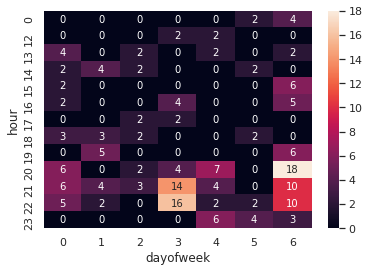

In [115]:
grouped = df_pros.groupby(['dayofweek','hour'])['counter'].sum().reset_index() #unstack()
piv = grouped.pivot('hour', 'dayofweek','counter').fillna(0)
sns.heatmap(piv, annot=True)

In [ ]:

#df_seattle['Offense Type'].value_counts()
#cp = df_seattle[df_seattle['Offense Type']=='THEFT-CARPROWL']
#cp = df_seattle
cp.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2) #, c='Longitude')